- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [49]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# 히스토그램 (Histogram)

## Histogram

- 이미지의 밝기의 분포를 그래프로 표현한 방식

- 이미지의 전체의 밝기 분포와 채도(밝고 어두움)을 알 수 있음

<img src="https://opencv-python.readthedocs.io/en/latest/_images/image013.jpg">

<sub>[이미지 출처] https://www.cambridgeincolour.com/tutorials/histograms1.htm</sub>

<br>

## 용어 설명

- BINS 
  
  - 히스토그램 그래프의 X축의 간격  
    위 그림의 경우에는 0 ~ 255를 표현하였기 때문에 BINS값은 256이 된다.  
    BINS값이 16이면 0 ~ 15, 16 ~ 31..., 240 ~ 255와 같이 X축이 16개로 표현  
    OpenCV에서는 BINS를 histSize 라고 표현

- DIMS 

  - 이미지에서 조사하고자하는 값을 의미  
    빛의 강도를 조사할 것인지, RGB값을 조사할 것인지를 결정

- RANGE 

  - 측정하고자하는 값의 범위  

<br>

- `cv2.calcHist()`

  - Parameters
    - `image` : 분석대상 이미지(uint8 or float32 type). Array형태.

    - `channels` : 분석 채널(X축의 대상)
    
      - 이미지가 graysacle이면 [0], color 이미지이면 [0],[0,1] 형태(1 : Blue, 2: Green, 3: Red)

    - `mask` : 이미지의 분석영역. None이면 전체 영역.

    - `histSize` : BINS 값. [256]

    - `ranges` : Range값. [0,256]


* flower1.jpg

![](https://cdn.pixabay.com/photo/2015/10/09/00/55/lotus-978659_960_720.jpg)

<sub>[이미지 출처] https://pixabay.com/ko/photos/%EB%A1%9C%ED%84%B0%EC%8A%A4-%EA%BD%83-%EC%97%AC%EB%A6%84-%EC%A0%A0-%EC%9E%90%EC%97%B0-978659/</sub>

* flower2.jpg

![](https://cdn.pixabay.com/photo/2012/03/01/00/55/garden-19830_960_720.jpg)

<sub>[이미지 출처] https://pixabay.com/ko/photos/%EC%A0%95%EC%9B%90-%EA%BD%83-%EB%82%98%EB%B9%84-19830/</sub>

In [50]:
files.upload()

Saving garden-19830_640.jpg to garden-19830_640 (1).jpg
Saving lotus-978659_640.jpg to lotus-978659_640 (1).jpg


{'garden-19830_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xa9\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x06\x00\x07\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf9\xc0\xcd\x1c\x0

In [51]:
img1 = cv2.imread('garden-19830_640.jpg',0)
img2 = cv2.imread('lotus-978659_640.jpg',0)


In [52]:
hist1 = cv2.calcHist([img1], [0], None, [256], [0,256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])


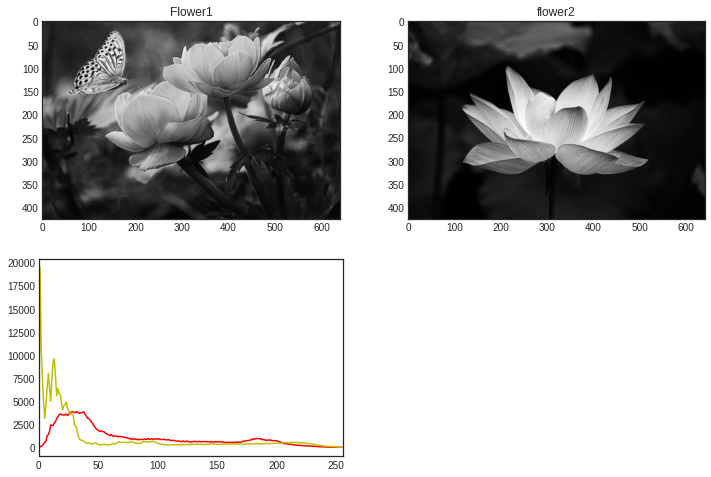

In [53]:
plt.figure(figsize = (12,8))
plt.subplot(221)
plt.imshow(img1, 'gray')
plt.title('Flower1')

plt.subplot(222)
plt.imshow(img2, 'gray')
plt.title('flower2')

plt.subplot(223)
plt.plot(hist1,color = 'r')
plt.plot(hist2, color = 'y')
plt.xlim(0,256)

plt.show()

# 어디가 밝고 어두운지
# 어두운 부분이 몰려있네 flower2는 꽃빼고 다 어두으니까 초반이 맣네
# flower1는 나름 잇지만 그래도 꽃과 나비부분빼고는 다 어렵지

## Mask를 적용한 히스토그램

![](https://cdn.pixabay.com/photo/2020/03/12/04/07/cat-4923824_960_720.jpg)

  <sub>[이미지 출처] https://pixabay.com/photos/cat-pet-feline-animal-4923824/</sub>

In [54]:
files.upload()

Saving cat-4923824_640.jpg to cat-4923824_640 (1).jpg


{'cat-4923824_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x01\xab\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x03\x04\x07\x02\x08\x01\x00\t\xff\xc4\x00G\x10\x00\x02\x01\x03\x03\x03\x02\x04\x05\x02\x04\x04\x05\x02\x03\t\x01\x02\x03\x00\x04\x11\x05\x12!\x061A\x13Q\x07"aq\x142\x81\x91\xa1#B\x15R\xb1\xc1\x08\x163\xd1$br\x82\xf0\xa2\xe

In [55]:
img = cv2.imread('cat-4923824_640.jpg') # 이번엔 컬로로 가져올게
print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

(427, 640, 3)


In [56]:
mask = np.zeros(img.shape[:2], np.uint8)  # 색말고모양만 가로세로 가져올게
mask[180:400, 260:600] = 255


In [57]:
masked_img = cv2.bitwise_and(img, img, mask=mask)  # 이렇게 미리 저장된 mask값을 넣어주면 잘 masking 되겟네


In [58]:
hist_full = cv2.calcHist([img], [1], None, [256], [0,256])    # 체널은 1, 전체 none, hist 사이즈는[256], range범위는 0~256

hist_mask = cv2.calcHist([masked_img], [1], mask, [256], [0,256])   # 마스크된 이미지의 결과


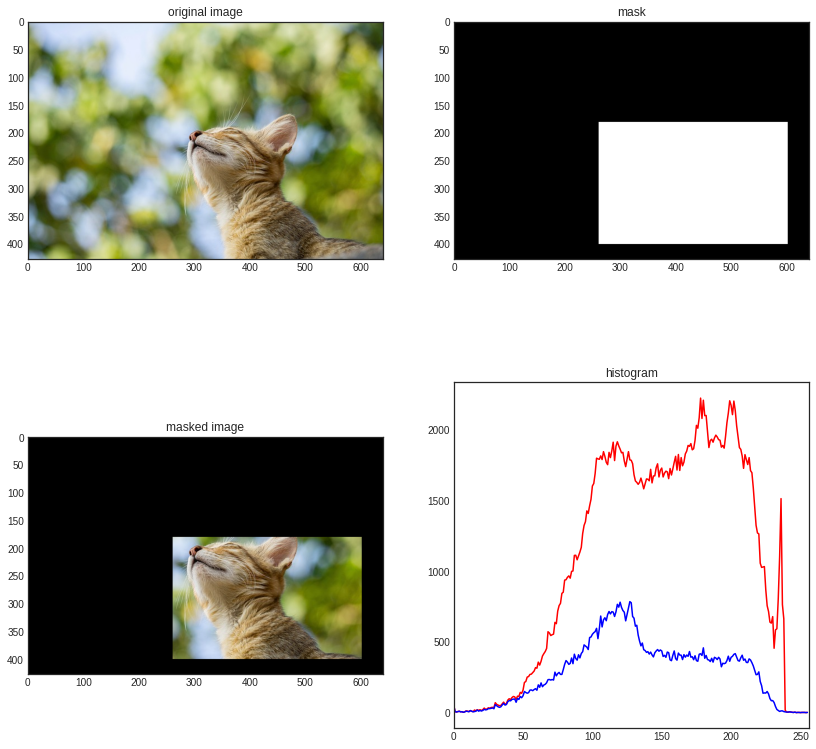

In [59]:
plt.figure(figsize = (14,14))
plt.subplot(221)
plt.imshow(img,'gray')
plt.title('original image')

plt.subplot(222)
plt.imshow(mask, 'gray')
plt.title('mask')

plt.subplot(223)
plt.imshow(masked_img, 'gray')
plt.title('masked image')

plt.subplot(224)
plt.title('histogram')
plt.plot(hist_full, color = 'r')
plt.plot(hist_mask, color = 'b')
plt.xlim([0,256])

plt.show()

# 빨간색이 전체 이미지에 대한
# 약간 밝은 색이 많지?

# 마스트 영역, 고양이 영역이 파란색
# histogram값이 좀 다르지?

## 히스토그램 평탄화

- 이미지의 히스토그램이 특정영역에 너무 집중되어 있으면 contrast가 낮아 좋은 이미지라고 할 수 없음

- 전체 영역에 골고루 분포가 되어 있을 때 좋은 이미지라고 할 수 있는데, 아래 히스토그램을 보면 좌측 처럼 특정 영역에 집중되어 있는 분포를 오른쪽 처럼 골고루 분포하도록 하는 작업을 Histogram Equalization 이라고 함

- (참고) 이론적인 방법

  - 이미지의 각 픽셀의 cumulative distribution function(cdf)값을 구하고 Histogram Equalization 공식에 대입하여 0 ~ 255 사이의 값으로 변환

  - 이렇게 새롭게 구해진 값으로 이미지를 표현하면 균일화된 이미지를 얻을 수 있음

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Histogrammeinebnung.png/600px-Histogrammeinebnung.png">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/Histogram_equalization</sub>

- Numpy를 활용하여 균일화 작업

* taiwan.jpg

  <img src="https://cdn.pixabay.com/photo/2020/08/03/13/33/taiwan-5460063_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EB%8C%80%EB%A7%8C-%EB%8F%84%EC%8B%9C-%EB%8F%84%EC%8B%9C-%ED%92%8D%EA%B2%BD-%EC%97%AC%ED%96%89-5460063/</sub>

In [60]:
# 약간은 어두운 부분이 많은 사진을 가져올게
files.upload()

Saving taiwan-5460063_640.jpg to taiwan-5460063_640 (1).jpg


{'taiwan-5460063_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xab\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x01\x02\x03\x05\x06\x00\x07\x08\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf2\x15N\xe8\xc5

In [61]:
img = cv2.imread('taiwan-5460063_640.jpg', 0)
print(img.shape)

(427, 640)


In [62]:
hist , bins = np.histogram(img.flatten(), 256, [0,256])


In [63]:
cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf,0)   #누적값으로 cdf 계산하고 msk처리해서 제외시킨다 numpy연산해서
                                    # 값이 0인 부분들을 mask 처리해라


In [64]:
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

cdf = np.ma.filled(cdf_m, 0).astype('uint8')    # cdf의 m부분, mask했던 부분을 다시 0으로 채줘울게


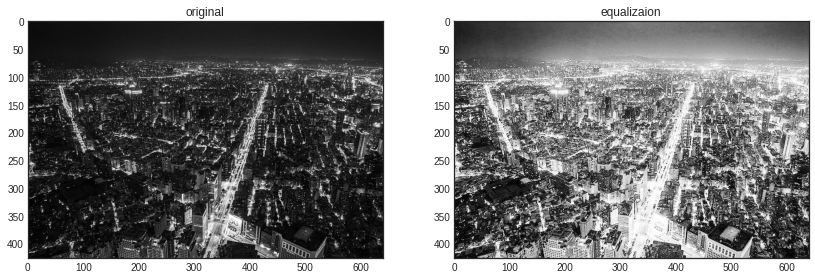

In [65]:
img2 = cdf[img]

plt.figure(figsize = (14,10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('equalizaion')

plt.show()

# 원본이 좀 어두운 부분
# equailzation 하니 균등하게, 밝아진 느낌이지

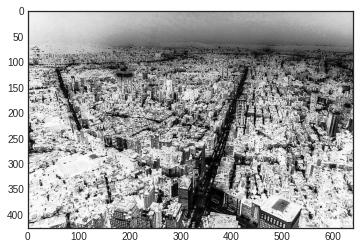

In [66]:
plt.imshow(img2)

- OpenCV 함수로 간단하게 처리

In [67]:
img = cv2.imread('taiwan-5460063_640.jpg',0)
print(img.shape)

(427, 640)


In [68]:
img2 = cv2.equalizeHist(img)

# 어이가 없누 너무 쉽게 되네

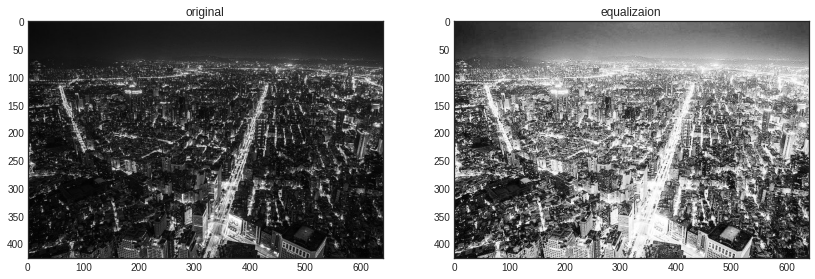

In [69]:
plt.figure(figsize = (14,10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('equalizaion')

plt.show()

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

- 지금까지의 처리는 이미지의 전체적인 부분에 균일화를 적용

- 하지만 일반적인 이미지는 밝은 부분과 어두운 부분이 섞여 있기 때문에 전체에 적용하는 것은 그렇게 유용하지 않음

- 이미지
  - 'keyboard.png'

  ![](https://cdn.pixabay.com/photo/2015/08/13/01/00/keyboard-886462_960_720.jpg)
  
  <sub>[이미지 출처] https://pixabay.com/ko/photos/%ED%82%A4%EB%B3%B4%EB%93%9C-%EC%BB%B4%ED%93%A8%ED%84%B0-%ED%82%A4-%ED%99%94%EC%9D%B4%ED%8A%B8-886462/</sub>

In [70]:
files.upload()

Saving keyboard-886462_640.jpg to keyboard-886462_640 (1).jpg


{'keyboard-886462_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01h\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x05\x06\x02\x07\x08\xff\xc4\x00\x14\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf4t\xc9\xa9o^\xe5\xe9\xdcg\x998W:\x18

In [71]:
img = cv2.imread('keyboard-886462_640.jpg', 0)

print(img.shape)

(360, 640)


In [72]:
img2 = cv2.equalizeHist(img)


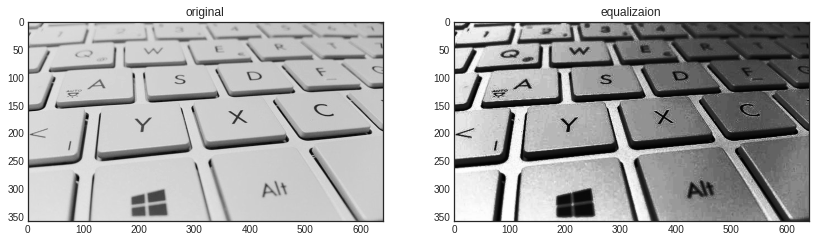

In [73]:
plt.figure(figsize = (14,10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('equalizaion')

plt.show()

# 오.. 오리지널은 밝은 이미지가 많지
# 균일화대서 전체적으로 좀 어둡게 됐네


- 위 결과에서 주변의 어두운 부분은 균일화가 적용되어 밝아졌지만, 가운데 이미지는 너무 밝아져 경계선을 알아볼 수 없게 되어버림

- 이 문제를 해결하기 위해서 `adaptive histogram equalization`을 적용하게 됨
  - 즉, 이미지를 작은 title형태로 나누어 그 title안에서 Equalization을 적용하는 방식
  
  - 작은 영역이다 보니 작은 노이즈(극단적으로 어둡거나, 밝은 영역)가 있으면 이것이 반영이 되어 원하는 결과를 얻을 수 없게 됨
  
  - 이 문제를 피하기 위해서 `contrast limit`라는 값을 적용하여 이 값을 넘어가는 경우는 그 영역은 다른 영역에 균일하게 배분하여 적용

In [74]:
img = cv2.imread('keyboard-886462_640.jpg', 0)
print(img.shape)

(360, 640)


In [75]:
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
img2 = clahe.apply(img)

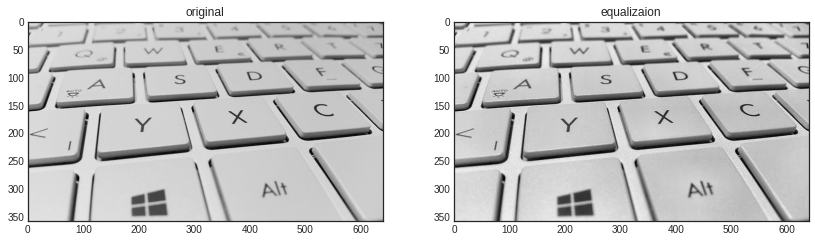

In [76]:
plt.figure(figsize = (14,10))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2, 'gray')
plt.title('equalizaion')

plt.show()

# 살짝 차이가 있는데 윗부분이 오리지날에손 hist가 무너졌는데
# equalizaion하니까 윗부분이 두드러졌지?

## 2D Histogram

- 지금까지 Histogram은 1차원으로 grayscale 이미지의 pixel의 강도, 즉 빛의 세기를 분석한 결과

- 2D Histogrm 은 Color 이미지의 Hue(색상) & Saturation(채도)을 동시에 분석하는 방법

- 색상과 채도를 분석하기 때문에 HSV Format으로 변환해야 함

- `cv2.calcHist()`

  - Parameters
    - `image` : HSV로 변환된 이미지

    - `channel` : 0-> Hue, 1-> Saturation

    - `bins` : [180,256] 첫번째는 Hue, 두번째는 Saturation

    - `range` : [0,180,0,256] : Hue(0~180), Saturation(0,256)



- 이미지

  - canal.jpg

  <img src="https://cdn.pixabay.com/photo/2020/08/14/15/22/canal-5488271_960_720.jpg">

  <sub>[이미지 출처] https://pixabay.com/photos/canal-boats-buildings-reflection-5488271/</sub>

In [77]:
files.upload()

Saving canal-5488271_640.jpg to canal-5488271_640 (1).jpg


{'canal-5488271_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x01\xab\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x00\x01\x02\x04\x05\x06\x07\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x02\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xe7\xa6Y\xfb\xbe(

In [78]:
# 너어무 이쁘다잉ㅋㅋ
img = cv2.imread('canal-5488271_640.jpg')
print(img.shape)


(427, 640, 3)


In [79]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


In [81]:
hist = cv2.calcHist([hsv], [0,1], None, [180, 256], [0,180,0,256])

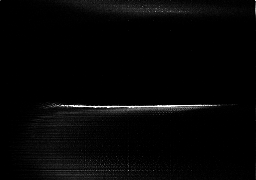

In [82]:
cv2_imshow(hist)

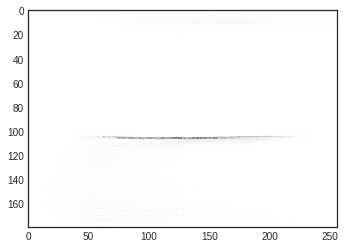

In [83]:
plt.imshow(hist)
plt.show()

- 위 Histogram을 보면 X축은 Saturation, Y축은 Hue값을 나타냄

- Y축을 보면 100근처에 값이 모여 있는 것을 알 수 있음
- HSV모델에서 H가 100이면 하늘색
- 이 이미지는 하늘색이 많이 분포되어 있다는 것을 2D Histogram을 통해서 알 수 있음
